In [1]:
# machine learning classification

from sklearn.svm import SVC

from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score

# For data manipulation

import pandas as pd

import numpy as np

# To plot

import matplotlib.pyplot as plt

import seaborn

In [12]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='80F7OROZRHLB348X', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='INX',interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2018-04-10 09:31:00  2638.41  2648.74  2638.41   2648.74        0.0
2018-04-10 09:32:00  2648.80  2649.35  2648.40   2648.67        0.0


In [13]:
data.columns = ['Open', 'High','Low','Close','Volume']

df = data[['Open', 'High','Low','Close']]
df.head(2)

,Open,High,Low,Close
date,,,,
2018-04-10 09:31:00,2638.41,2648.74,2638.41,2648.74
2018-04-10 09:32:00,2648.80,2649.35,2648.40,2648.67


In [15]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [16]:
df['Open-Close'] = df.Open - df.Close

df['High-Low'] = df.High - df.Low

X=df[['Open-Close','High-Low']]

In [17]:
split_percentage = 0.8

split = int(split_percentage*len(df))

In [18]:
# Train data set

X_train = X[:split]

y_train = y[:split]

In [19]:
cls = SVC().fit(X_train, y_train)

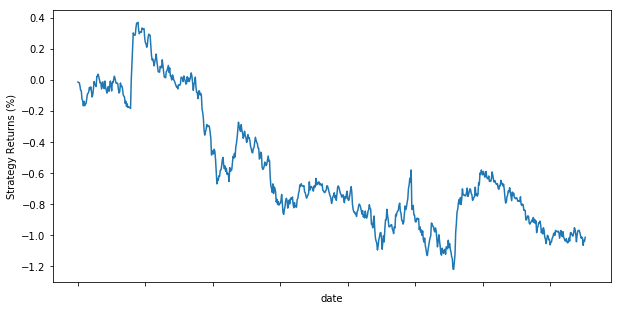

In [21]:
df['Predicted_Signal'] = cls.predict(X)
# Calculate log returns

df['Return'] = np.log(df.Close.shift(-1) / df.Close)*100

df['Strategy_Return'] = df.Return * df.Predicted_Signal

df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))

plt.ylabel("Strategy Returns (%)")

plt.show()